# Airbnb Amsterdam 探索性数据分析 / Airbnb Amsterdam Exploratory Data Analysis

本 Notebook 包含对 Airbnb 阿姆斯特丹房源数据的完整探索性数据分析。

This notebook contains a complete exploratory data analysis of Airbnb Amsterdam listings data.

## 分析内容 / Analysis Contents

1. 数据加载和基本信息 / Data Loading and Basic Information
2. 缺失值检查 / Missing Value Check
3. 数据清洗 / Data Cleaning
4. 房源活动分析 / Activity Analysis
5. 描述性统计分析 / Descriptive Statistics
6. 许可证分析 / License Analysis
7. 顶级房东分析 / Top Hosts Analysis


In [ ]:
! pip3 install pandas
! pip3 install matplotlib
! pip3 install numpy
! pip3 install openpyxl

  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 17.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 16.5 MB/s eta 0:00:00a 0:00:01
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [pandas]2m3/4 [pandas]

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
  Using cached contourpy-1.3.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 17.7 MB/s eta 0:00:00a 0:00:01
Using cached contourpy-1.3.3-cp311-cp311-macosx_11_0_arm64.whl (270 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# 导入必要的库 / Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# 设置中文字体支持（如果需要）/ Set Chinese font support (if needed)
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'SimHei']  # 用于显示中文 / For displaying Chinese
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号 / Normal display of minus sign

# 确保输出目录存在 / Ensure output directory exists
os.makedirs("../../charts", exist_ok=True)

print("库导入完成 / Libraries imported successfully")


库导入完成 / Libraries imported successfully


## 1. 数据加载 / Data Loading


In [ ]:
# 读取房源数据 / Read listings data
# 使用相对路径读取数据文件 / Use relative path to read data file
listing = pd.read_csv("../../data/listings.csv")

print(f"数据形状 / Data shape: {listing.shape}")
print(f"列数 / Number of columns: {len(listing.columns)}")
print("\n前5行数据 / First 5 rows:")
listing.head()


数据形状 / Data shape: (16116, 18)
列数 / Number of columns: 18

前5行数据 / First 5 rows:


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,59,3,280,2019-11-21,2.86,1,124,2,0363 5F3A 5684 6750 D14D
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36407,4.89393,Private room,106,1,339,2020-03-27,3.64,2,0,0,0363 CBB3 2C10 0C2A 1E29
2,25428,"Lovely, sunny 1 bed apt in Ctr (w.lift) & firepl.",56142,Joan,NaN,Centrum-West,52.37490,4.88487,Entire home/apt,125,14,5,2020-01-02,0.11,1,57,0,NaN
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,141,2,223,2021-08-21,2.14,1,66,4,0363 974D 4986 7411 88D8
4,28871,Comfortable double room,124245,Edwin,NaN,Centrum-West,52.36775,4.89092,Private room,75,2,353,2021-08-27,4.59,2,298,19,0363 607B EA74 0BD8 2F6F


## 2. 缺失值检查 / Missing Value Check


In [ ]:
# 查找缺失值 / Find missing values
# 统计每个特征的缺失值数量 / Count missing values for each feature
missing_value_count = listing.isnull().sum()
print("---Number of null in each feature")
print(missing_value_count)

# 仅显示有缺失值的特征 / Display only features with missing values
missing_feature = missing_value_count[missing_value_count > 0]
print("\n---Number of null value in this feature")
if missing_feature.empty:
    print("No null value feature")
else:
    print(missing_feature)


---Number of null in each feature
id                                    0
name                                 30
host_id                               0
host_name                             5
neighbourhood_group               16116
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        2087
reviews_per_month                  2087
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           11561
dtype: int64

---Number of null value in this feature
name                      30
host_name                  5
neighbourhood_group    16116
last_review             2087
reviews_per_month       2087
license                11561
dtype: int64


## 3. 数据清洗 / Data Cleaning


In [ ]:
# 删除neighbourhood_group列 / Drop neighbourhood_group column
listing = listing.drop("neighbourhood_group", axis=1)

# 用0填充review相关字段的空值 / Fill null values in review-related fields with 0
listing["last_review"] = listing["last_review"].fillna(0)
listing["reviews_per_month"] = listing["reviews_per_month"].fillna(0)

# 用blank_name填充name和host_name的空值 / Fill null values in name and host_name with blank_name
listing["name"] = listing["name"].fillna("blank_name")
listing["host_name"] = listing["host_name"].fillna("blank_host_name")

# 用0填充license字段的空值 / Fill null values in license field with 0
listing["license"] = listing["license"].fillna(0)

print("数据清洗完成 / Data cleaning completed")
print(f"清洗后数据形状 / Data shape after cleaning: {listing.shape}")


数据清洗完成 / Data cleaning completed
清洗后数据形状 / Data shape after cleaning: (16116, 17)


## 4. 数据基本信息描述 / Basic Data Information


In [ ]:
# 数据基本信息 / Basic data information
print("数据信息 / Data Info:")
print(listing.info())

print("\n数据统计描述 / Data Description:")
listing.describe()


数据信息 / Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16116 entries, 0 to 16115
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              16116 non-null  int64  
 1   name                            16116 non-null  object 
 2   host_id                         16116 non-null  int64  
 3   host_name                       16116 non-null  object 
 4   neighbourhood                   16116 non-null  object 
 5   latitude                        16116 non-null  float64
 6   longitude                       16116 non-null  float64
 7   room_type                       16116 non-null  object 
 8   price                           16116 non-null  int64  
 9   minimum_nights                  16116 non-null  int64  
 10  number_of_reviews               16116 non-null  int64  
 11  last_review                     16116 non-null  object 
 12  reviews_per_mo

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.611600e+04,1.611600e+04,16116.000000,16116.000000,16116.000000,16116.000000,16116.000000,16116.000000,16116.000000,16116.000000,16116.000000
mean,2.118184e+07,6.976052e+07,52.365510,4.889434,156.908476,3.991189,24.645383,0.589736,1.636883,55.316890,1.386262
std,1.352063e+07,9.027164e+07,0.016563,0.036151,173.418216,20.987452,56.707709,1.621155,2.402076,107.907731,7.477153
min,2.818000e+03,3.159000e+03,52.290340,4.755710,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.018020e+07,9.735558e+06,52.355130,4.863690,96.000000,2.000000,2.000000,0.060000,1.000000,0.000000,0.000000
50%,1.926593e+07,2.974134e+07,52.364880,4.886900,130.000000,2.000000,8.000000,0.210000,1.000000,0.000000,0.000000
75%,3.107548e+07,8.988321e+07,52.375440,4.909160,180.000000,3.000000,22.000000,0.540000,1.000000,47.000000,0.000000
max,5.208280e+07,4.210037e+08,52.425340,5.066508,8000.000000,1100.000000,877.000000,107.840000,30.000000,365.000000,422.000000


## 5. 房源活动分析 / Activity Analysis


The average nights booked is 310 days
The average price per night is $157


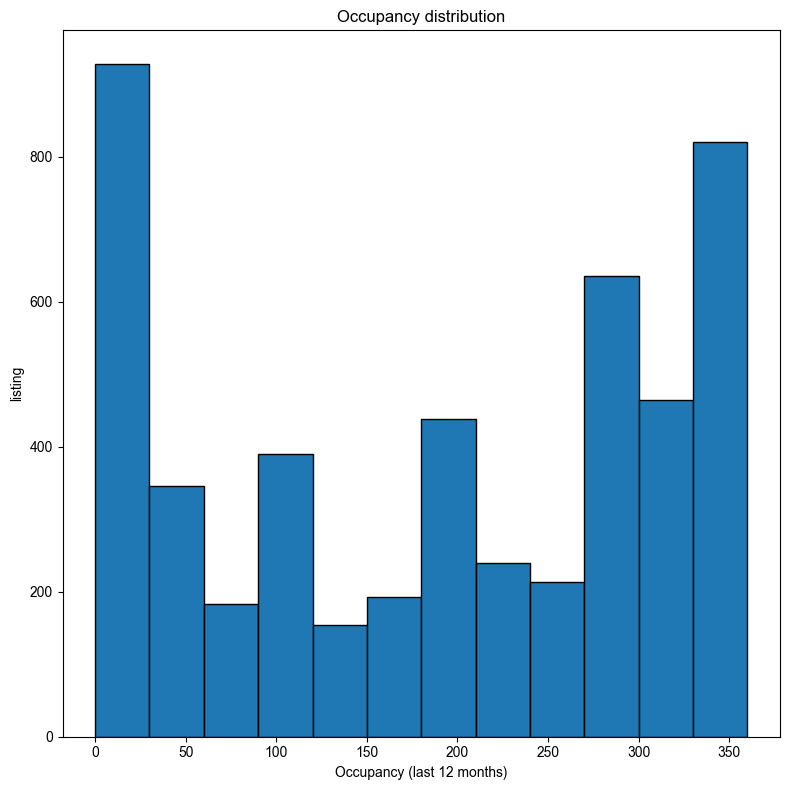

图表已保存至: charts/occupancy_distribution.png


In [ ]:
# 计算平均入住天数 / Calculate average occupancy days
# occupancy days = 365 - availability_365
listing["occupancy days"] = 365 - listing["availability_365"]
print(f"The average nights booked is {round(listing['occupancy days'].mean())} days")

# 计算平均价格 / Calculate average price per night
print(f"The average price per night is ${round(listing['price'].mean())}")

# 绘制入住天数分布直方图 / Plot occupancy days distribution histogram
plt.figure(figsize=(8, 8))
listing["occupancy days"].plot(kind="hist", bins=list(range(0, 365, 30)), edgecolor="black")
plt.title("Occupancy distribution")
plt.xlabel("Occupancy (last 12 months)")
plt.ylabel("listing")
plt.tight_layout()
plt.savefig("../../charts/occupancy_distribution.png", dpi=300, bbox_inches='tight')
plt.show()
print("图表已保存至: charts/occupancy_distribution.png")


## 6. 描述性统计分析 / Descriptive Statistics Analysis


价格统计描述 / Price Statistics:
count    16116.000000
mean       156.908476
std        173.418216
min          0.000000
25%         96.000000
50%        130.000000
75%        180.000000
max       8000.000000
Name: price, dtype: float64


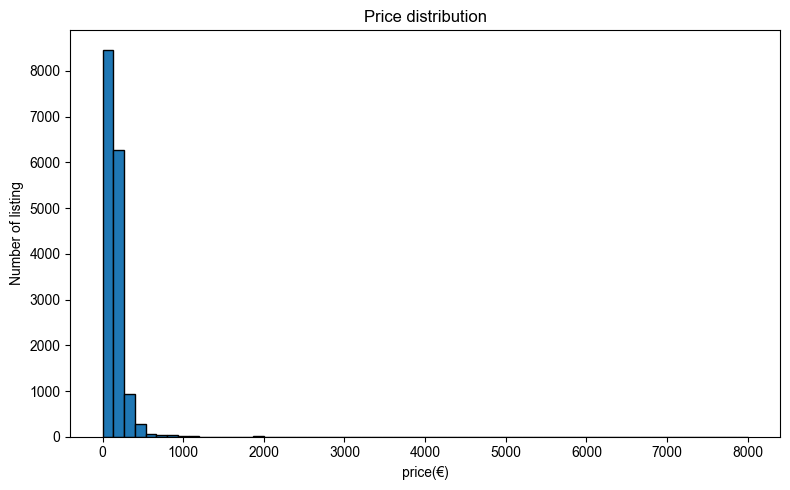

图表已保存至: charts/price_distribution.png


In [ ]:
# 价格分布分析 / Price distribution analysis
print("价格统计描述 / Price Statistics:")
print(listing["price"].describe())

plt.figure(figsize=(8, 5))
listing['price'].plot(kind='hist', bins=60, edgecolor='black')
plt.title('Price distribution')
plt.xlabel("price(€)")
plt.ylabel("Number of listing")
plt.tight_layout()
plt.savefig("../../charts/price_distribution.png", dpi=300, bbox_inches='tight')
plt.show()
print("图表已保存至: charts/price_distribution.png")


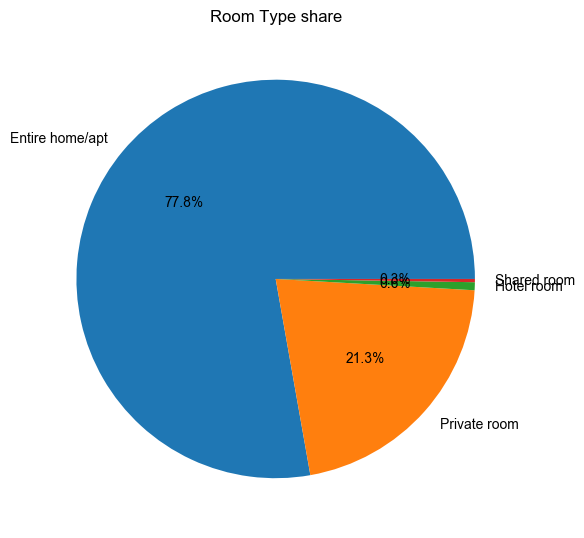

图表已保存至: charts/room_type_distribution.png


In [ ]:
# 房型分布分析 / Room type distribution analysis
plt.figure(figsize=(6, 6))
listing["room_type"].value_counts().plot(kind='pie', autopct="%1.1f%%")
plt.title('Room Type share')
plt.ylabel("")
plt.tight_layout()
plt.savefig("../../charts/room_type_distribution.png", dpi=300, bbox_inches='tight')
plt.show()
print("图表已保存至: charts/room_type_distribution.png")


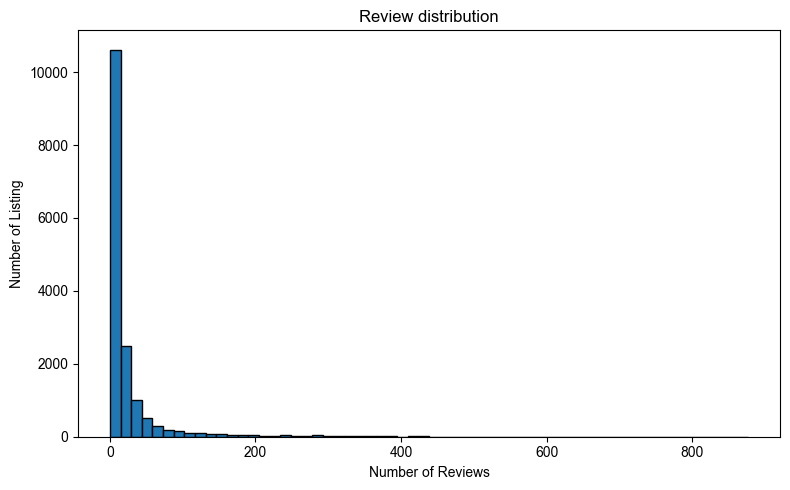

图表已保存至: charts/review_distribution.png


In [ ]:
# 评论数量分布分析 / Review distribution analysis
plt.figure(figsize=(8, 5))
listing["number_of_reviews"].plot(kind='hist', bins=60, edgecolor="black")
plt.title("Review distribution")
plt.xlabel("Number of Reviews")
plt.ylabel("Number of Listing")
plt.tight_layout()
plt.savefig("../../charts/review_distribution.png", dpi=300, bbox_inches='tight')
plt.show()
print("图表已保存至: charts/review_distribution.png")


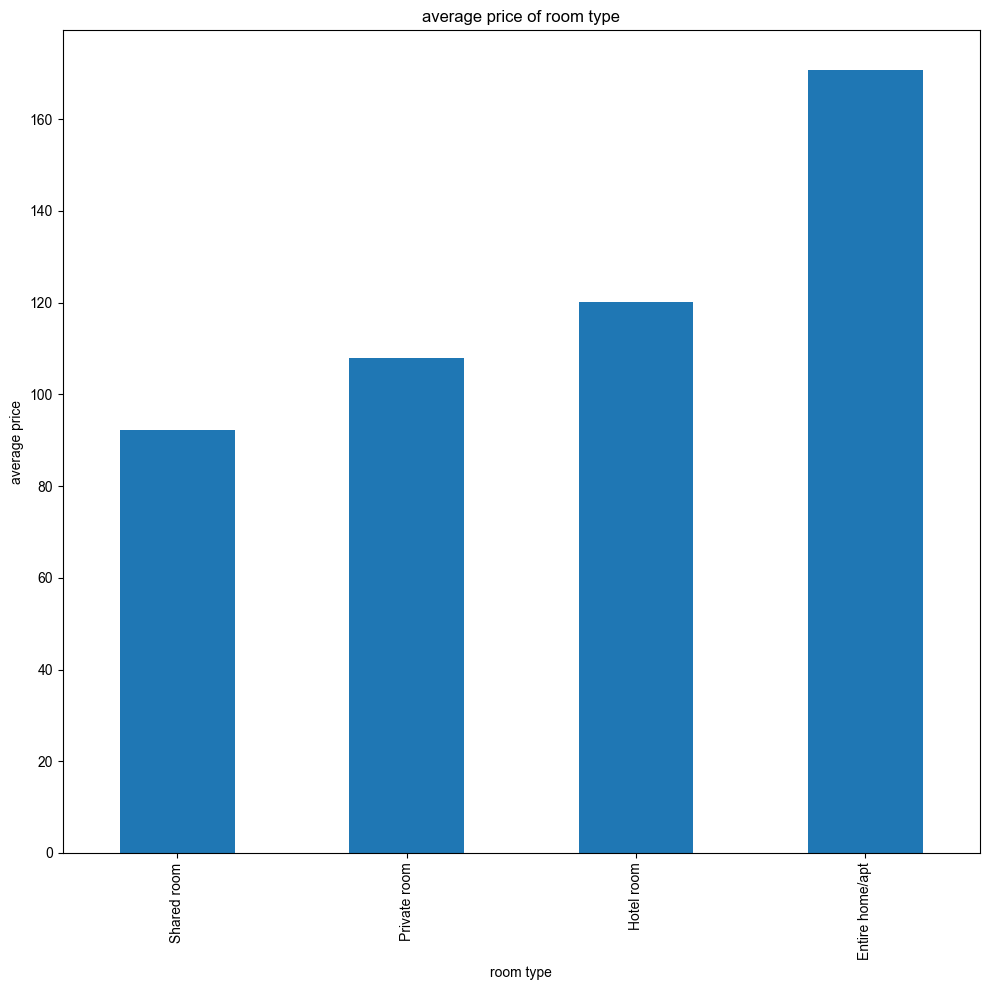

图表已保存至: charts/avg_price_by_room_type.png


In [ ]:
# 不同房型的平均价格分析 / Average price analysis by room type
plt.figure(figsize=(10, 10))
listing.groupby("room_type")["price"].mean().sort_values().plot(kind='bar')
plt.title("average price of room type")
plt.xlabel("room type")
plt.ylabel("average price")
plt.tight_layout()
plt.savefig("../../charts/avg_price_by_room_type.png", dpi=300, bbox_inches='tight')
plt.show()
print("图表已保存至: charts/avg_price_by_room_type.png")


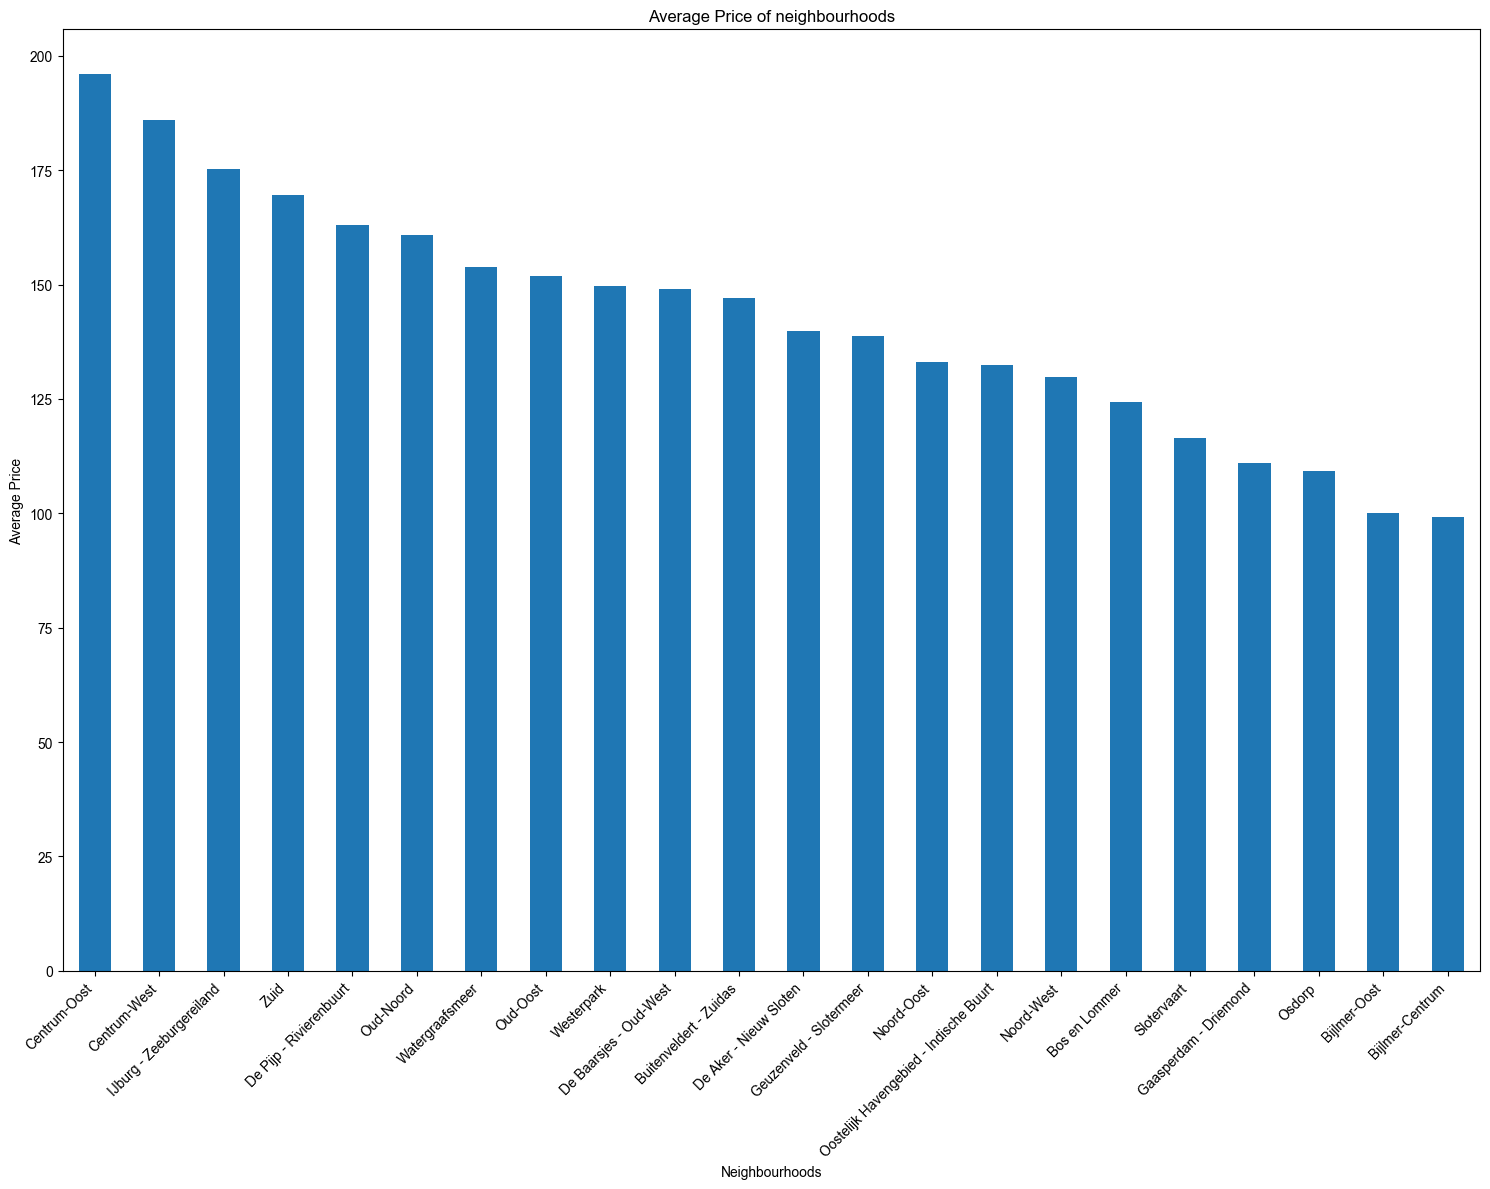

图表已保存至: charts/avg_price_by_neighbourhood.png


In [ ]:
# 不同街区的平均价格分析 / Average price analysis by neighbourhood
plt.figure(figsize=(15, 12))
listing.groupby("neighbourhood")["price"].mean().sort_values(ascending=False).plot(kind="bar")
plt.title("Average Price of neighbourhoods")
plt.xlabel("Neighbourhoods")
plt.ylabel("Average Price")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("../../charts/avg_price_by_neighbourhood.png", dpi=300, bbox_inches='tight')
plt.show()
print("图表已保存至: charts/avg_price_by_neighbourhood.png")


## 7. 许可证分析 / License Analysis


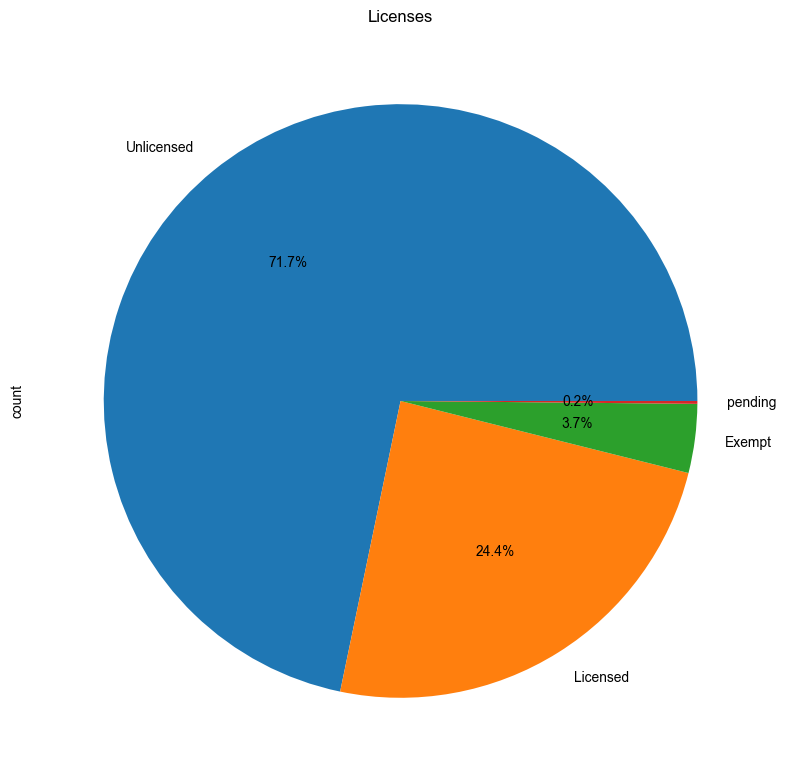

图表已保存至: charts/license_distribution.png

许可证分类统计 / License Classification Statistics:
License_label
Unlicensed    11561
Licensed       3926
Exempt          604
pending          25
Name: count, dtype: int64


In [ ]:
# 许可证分类处理 / License classification processing
# 根据license字段的值进行分类：0->Unlicensed, "Exempt"->Exempt, 0363开头->Licensed, 其他->pending
# Classify licenses based on license field: 0->Unlicensed, "Exempt"->Exempt, starts with 0363->Licensed, others->pending
pie_label = np.select(
    [
        listing["license"] == 0,
        listing["license"] == "Exempt",
        listing["license"].astype(str).str.startswith("0363")
    ],
    ["Unlicensed", "Exempt", "Licensed"],
    default="pending"
)
listing["License_label"] = pie_label

# 许可证分布饼图 / License distribution pie chart
plt.figure(figsize=(8, 8))
listing["License_label"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Licenses")
plt.tight_layout()
plt.savefig("../../charts/license_distribution.png", dpi=300, bbox_inches='tight')
plt.show()
print("图表已保存至: charts/license_distribution.png")

# 显示许可证分类统计 / Display license classification statistics
print("\n许可证分类统计 / License Classification Statistics:")
print(listing["License_label"].value_counts())


## 8. 顶级房东分析 / Top Hosts Analysis


In [ ]:
# 顶级房东分析 / Top hosts analysis
# 使用交叉表统计每个房东的房型分布 / Use crosstab to count room type distribution for each host
room_count = pd.crosstab(listing["host_name"], listing["room_type"])
# 计算每个房东的总房源数 / Calculate total listings for each host
room_count["listings"] = room_count.sum(axis=1)
# 按房源数量降序排序 / Sort by total listings in descending order
room_count = room_count.sort_values(by="listings", ascending=False)
# 显示前10名房东 / Display top 10 hosts
print("前10名房东及其房源分布 / Top 10 Hosts and their Room Type Distribution:")
room_count.head(10)


前10名房东及其房源分布 / Top 10 Hosts and their Room Type Distribution:


room_type,Entire home/apt,Hotel room,Private room,Shared room,listings
host_name,,,,,
Peter,52,0,26,0,78
Martijn,70,0,6,0,76
Thomas,69,0,6,0,75
Jasper,69,0,5,0,74
Anne,64,0,5,1,70
Jeroen,61,0,7,0,68
Eva,51,0,17,0,68
Sophie,59,0,7,0,66
Suzanne,54,0,9,2,65


## 分析总结 / Analysis Summary

本 Notebook 完成了以下分析：

1. ✅ 数据加载和基本信息查看
2. ✅ 缺失值检查和统计
3. ✅ 数据清洗（删除列、填充缺失值）
4. ✅ 房源活动分析（入住率、平均价格）
5. ✅ 描述性统计分析（价格、房型、评论分布）
6. ✅ 许可证分类和分布分析
7. ✅ 顶级房东排名分析

所有图表已保存至 `charts/` 目录。
